# Glacier Meltwater Runoff model
This notebook walks through modelling how meltwater will flow over a glacier and how it will change with different meltwater production.

In [28]:
from landlab.components import FlowDirectorD8, FlowAccumulator, SinkFillerBarnes

from landlab import RasterModelGrid
from landlab.plot.drainage_plot import drainage_plot
from landlab.plot.graph import plot_graph
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

## Create Class for DEM and FlowAccumulator

In [86]:
class GlacierSurfaceFlow:
    
    def __init__(self,case):
        if case == 'Parabola':
            self.case = case
            self.grid = RasterModelGrid((10,10)) #create model grid
            self.elev = self.grid.add_field("topographic__elevation", self.grid.y_of_node+ 0.1 * (self.grid.x_of_node-4)**2, at="node") #add sloping parabola as elevation
        
        if case == 'Channel':
            self.case = case
            self.grid = RasterModelGrid((10,10)) #create model grid
            self.elev = self.grid.add_field("topographic__elevation", 1*self.grid.y_of_node, at="node") 
            self.elev[(self.grid.x_of_node > 2) & (self.grid.x_of_node < 4)] -=2 #add channel to topography
            
        if case == 'Nye Dome':
            self.case = case
            self.grid = RasterModelGrid((100,100)) #create model grid
            
            # calculate 
            z2 = 700 - 0.5*((mg.y_of_node-50)**2 + (mg.x_of_node-50)**2)
            z2[z2 <0]=0
            elev = mg.add_field('topographic__elevation',np.sqrt(z2),at='node')
        
    def create_flow_acc(self,flow_director='FlowDirectorD8'):
        self.fa = FlowAccumulator(self.grid,flow_director=flow_director)
        self.fa.run_one_step()
        self.da,self.q = self.fa.accumulate_flow()
        return 'Hi'
    
    def surf_plot(self,surface='topographic__elevation', title=None):
        if title == None:
            title = f'Topography for {self.case}'
        plt.figure()
        ax=plt.axes(projection='3d')

        # plot the surface
        z = self.grid.at_node[surface].reshape(self.grid.shape)
        color = cm.gray((z - z.min()) / (z.max() - z.min()))
        ax.plot_surface(
            self.grid.x_of_node.reshape(self.grid.shape),
            self.grid.y_of_node.reshape(self.grid.shape),
            z,
            rstride=1,
            cstride=1,
            cmap=cm.gray,
            linewidth=0.0,
            antialiased=False,
        )
        ax.view_init(elev=35,azim=-120)
        ax.set_xlabel('x axis')
        ax.set_ylabel('y axis')
        ax.set_zlabel('elevation')
        plt.title(title)
        plt.show()

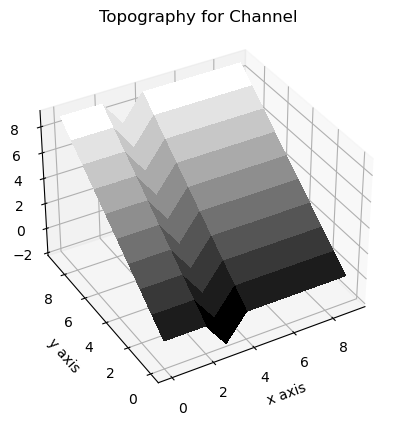

In [79]:
GlacierSurfaceFlow('Channel').surf_plot()

In [92]:
test = GlacierSurfaceFlow('Channel')

In [93]:
test.create_flow_acc()
test.q

array([  0.,   8.,   0.,  24.,   0.,   8.,   8.,   8.,   8.,   0.,   0.,
         8.,   1.,  22.,   1.,   8.,   8.,   8.,   8.,   0.,   0.,   7.,
         1.,  19.,   1.,   7.,   7.,   7.,   7.,   0.,   0.,   6.,   1.,
        16.,   1.,   6.,   6.,   6.,   6.,   0.,   0.,   5.,   1.,  13.,
         1.,   5.,   5.,   5.,   5.,   0.,   0.,   4.,   1.,  10.,   1.,
         4.,   4.,   4.,   4.,   0.,   0.,   3.,   1.,   7.,   1.,   3.,
         3.,   3.,   3.,   0.,   0.,   2.,   1.,   4.,   1.,   2.,   2.,
         2.,   2.,   0.,   0.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.])

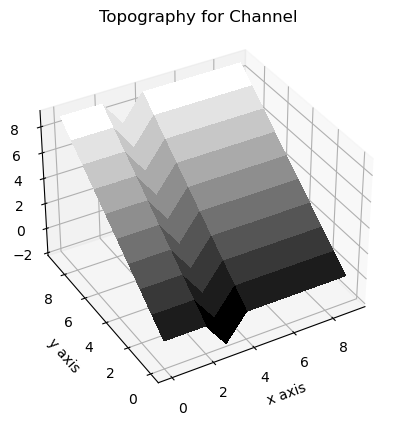

In [76]:
test.surf_plot()

In [78]:
test.create_flow_acc()
test.q

array([  0.,   8.,   0.,  24.,   0.,   8.,   8.,   8.,   8.,   0.,   0.,
         8.,   1.,  22.,   1.,   8.,   8.,   8.,   8.,   0.,   0.,   7.,
         1.,  19.,   1.,   7.,   7.,   7.,   7.,   0.,   0.,   6.,   1.,
        16.,   1.,   6.,   6.,   6.,   6.,   0.,   0.,   5.,   1.,  13.,
         1.,   5.,   5.,   5.,   5.,   0.,   0.,   4.,   1.,  10.,   1.,
         4.,   4.,   4.,   4.,   0.,   0.,   3.,   1.,   7.,   1.,   3.,
         3.,   3.,   3.,   0.,   0.,   2.,   1.,   4.,   1.,   2.,   2.,
         2.,   2.,   0.,   0.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.])

## Create FlowAccumulator Tool
Testing how FlowAccumulator works

In [47]:
# plotting routine to make 3d plot of our surface
def surf_plot(mg,surface='topographic__elevation',title='Ice topography'):
    plt.figure()
    ax=plt.axes(projection='3d')
    
    # plot the surface
    z = mg.at_node[surface].reshape(mg.shape)
    #color = cm.gray((z - z.min()) / (z.max() - z.min()))
    ax.plot_surface(
        mg.x_of_node.reshape(mg.shape),
        mg.y_of_node.reshape(mg.shape),
        z,
        rstride=1,
        cstride=1,
        cmap=cm.cividis,
        linewidth=0.0,
        antialiased=False,
    )
    ax.view_init(elev=35,azim=-120)
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_zlabel('elevation')
    plt.title(title)
    plt.show()

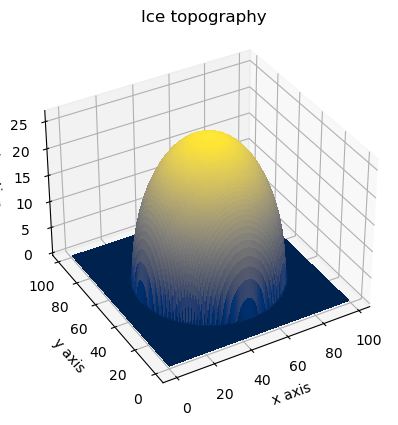

In [73]:
mg = RasterModelGrid((100,100))

z2 = 700 - 0.5*((mg.y_of_node-50)**2 + (mg.x_of_node-50)**2)
z2[z2 <0]=0
elev = mg.add_field('topographic__elevation',np.sqrt(z2),at='node')
surf_plot(mg)

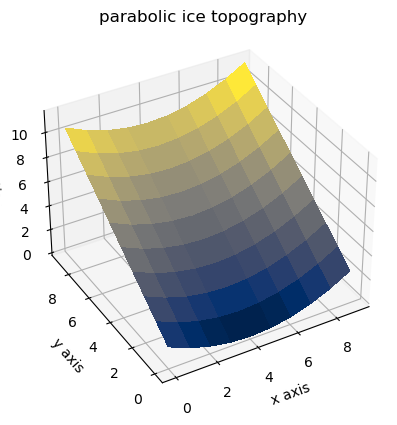

In [49]:
mg1 = RasterModelGrid((10,10))
elev = mg1.add_field("topographic__elevation", mg1.y_of_node+ 0.1 * (mg1.x_of_node-4)**2, at="node",clobber=True)
surf_plot(mg1,title='parabolic ice topography')

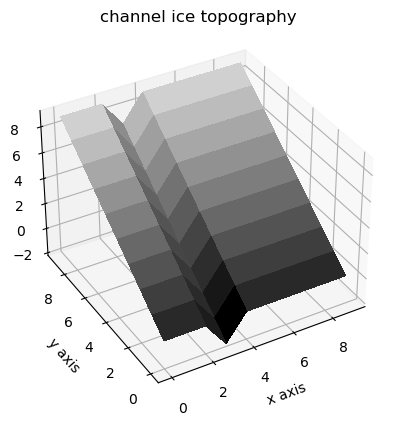

In [4]:
mg2 = RasterModelGrid((10,10))
elev2 = mg2.add_field("topographic__elevation", 1*mg2.y_of_node, at="node",clobber=True)
elev2[(mg2.x_of_node > 2) & (mg1.x_of_node < 4)] -=2
surf_plot(mg2,title='channel ice topography')

In [5]:
fd1 = FlowDirectorD8(mg1,'topographic__elevation')
fd2 = FlowDirectorD8(mg2,'topographic__elevation')

In [13]:
fd1.run_one_step()
receivers = fd1.direct_flow()

fd2.run_one_step()
receivers = fd2.direct_flow()

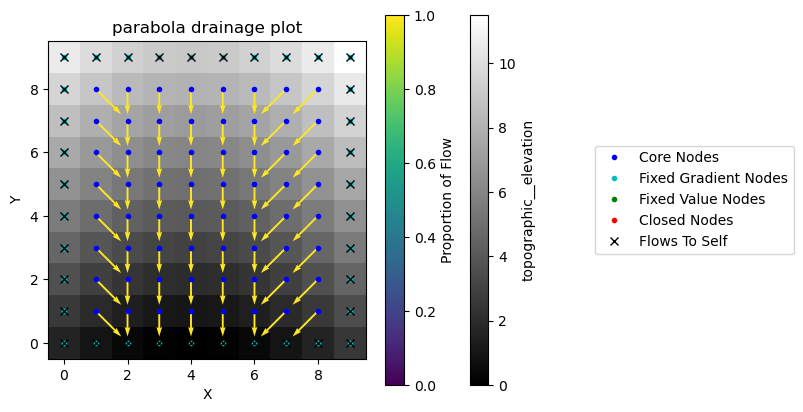

In [10]:
plt.figure()
drainage_plot(mg1,title='parabola drainage plot')

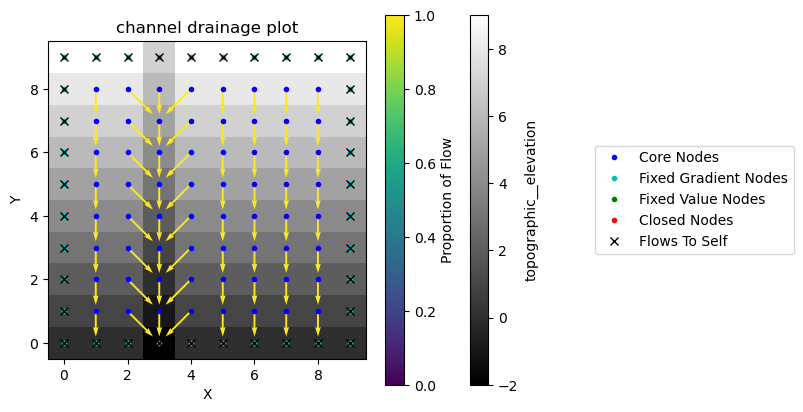

In [12]:
plt.figure()
drainage_plot(mg2,title = 'channel drainage plot')

In [27]:
fa1 = FlowAccumulator(mg1,flow_director='FlowDirectorD8')
fa2 = FlowAccumulator(mg2,flow_director='FlowDirectorD8')

In [28]:
fa1.run_one_step()
(da1,q1) = fa1.accumulate_flow()

fa2.run_one_step()
(da2,q2) = fa2.accumulate_flow()

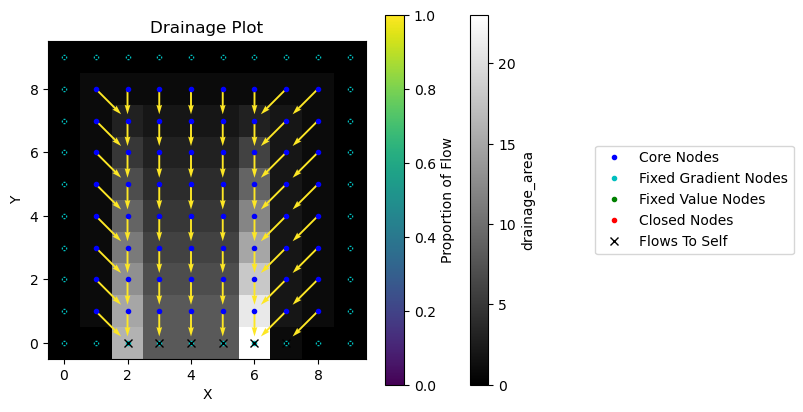

In [29]:
plt.figure()
drainage_plot(mg1,'drainage_area')

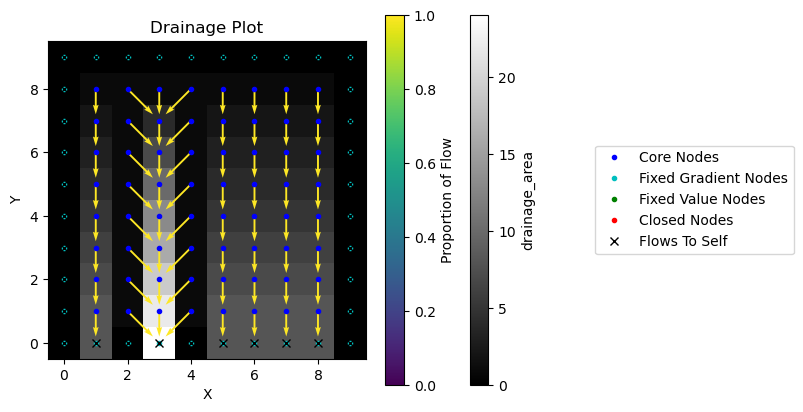

In [30]:
plt.figure()
drainage_plot(mg2,'drainage_area')

In [22]:
mg1.at_node.keys()

['topographic__elevation',
 'flow__link_to_receiver_node',
 'flow__receiver_node',
 'topographic__steepest_slope',
 'water__unit_flux_in',
 'drainage_area',
 'flow__data_structure_delta',
 'flow__upstream_node_order',
 'surface_water__discharge',
 'flow__sink_flag']